In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy import signal

196_NW1.bmp
196_NW1_middle_PL_D2_70%_200_200_600_x100_5x1_535-1000nm.txt
196_NW1_tip_left_PL_D2_70%_200_200_600_x100_5x1_535-1000nm.txt
196_NW1_tip_right_PL_D2_70%_200_200_600_x100_5x1_535-1000nm.txt
196_NW1_xx_left_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW1_xx_middle_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW1_xx_right_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW1_yy_left_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW1_yy_middle_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW1_yy_right_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW2.bmp
196_NW2_xx_left_PL_D2_80%_200_200_600_x100_5x2_700-950nm.txt
196_NW2_xx_middle_PL_D2_80%_200_200_600_x100_5x2_700-950nm.txt
196_NW2_xx_right_PL_D2_80%_200_200_600_x100_5x2_700-950nm.txt
196_NW3.bmp
196_NW3_xx_left_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW3_xx_middle_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW3_xx_right_PL_D2_70%_200_200_600_x100_5x2_700-950nm.txt
196_NW4.bmp
196_NW4_xx_left_PL_D

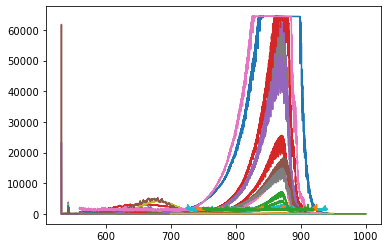

In [2]:
data = {}
if 'output' not in os.listdir():
    os.mkdir('output')
path = os.path.join(os.getcwd(), 'School 2022')
for file in os.listdir(path):
    print(file)
    if file[-3:]=='txt':
        data[file] = np.loadtxt(os.path.join(path,file))
        plt.plot(data[file][:,0], data[file][:,1])
        b, a = signal.butter(8, 0.125, 'lowpass')  
        filtedData = signal.filtfilt(b,a, data[file][:, 1])
        data[file][:, 1] = filtedData
        if ' ' in file and 'tip' not in file:
            print('nice')
            data[file][:,1]=5*data[file][:,1]
            print(data[file][0,1])
        output_file = os.path.join('output', file[:-3]+'csv')
        np.savetxt(output_file, data[file], delimiter=',')

<IPython.core.display.Javascript object>


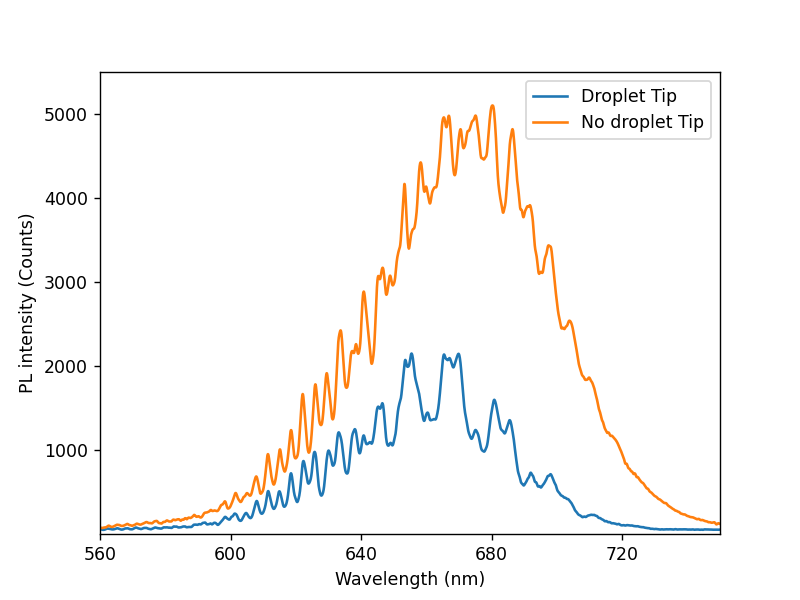

In [37]:
%matplotlib notebook
path = os.path.join(os.getcwd(), 'output')
names=['Droplet Tip', 'No droplet Tip']
i=0
for name in ['473_NW7_xx_tip1_PL_D0_80%_200_200_600_x100_5x2_520-800nm.csv', 
             '473_NW7_xx_tip2_PL_D0_80%_200_200_600_x100_5x2_520-800nm.csv']:

    data = np.loadtxt(os.path.join(path,name), delimiter=',')
    plt.plot(data[:,0], data[:,1], label = names[i])
    i+=1
plt.xlabel('Wavelength (nm)')
locs, labels = plt.xticks()
plt.locator_params(axis="x", steps= [1, 2, 4, 5, 10])
plt.ylim([1, 5500])
plt.xlim([560, 750])
#plt.locator_params(axis="y", nbins=4)
plt.ylabel('PL intensity (Counts)')
plt.legend()
plt.savefig('GaP Gapas two tips.jpg')

<IPython.core.display.Javascript object>


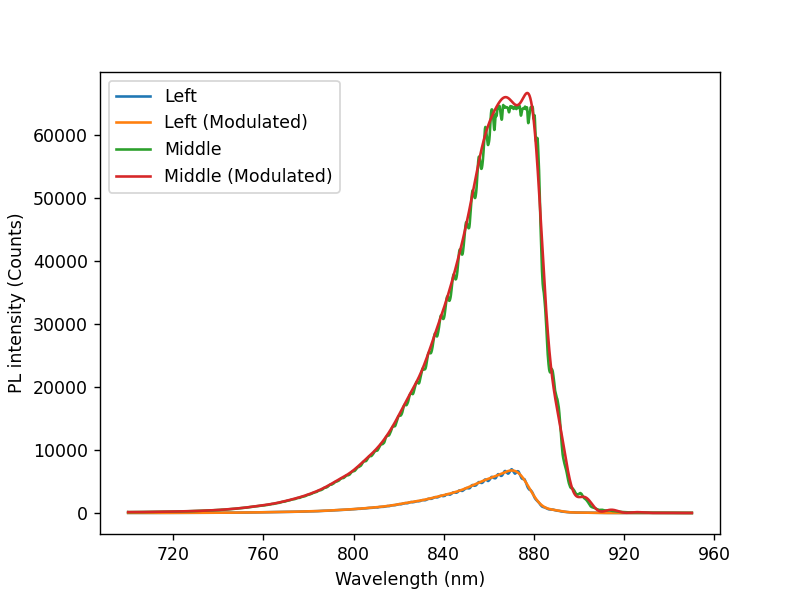

In [58]:
%matplotlib notebook
path = os.path.join(os.getcwd(), 'output')
names=['Left', 'Middle']
i=0
for name in ['196_NW3_xx_left_PL_D2_70%_200_200_600_x100_5x2_700-950nm.csv',
             '196_NW3_xx_middle_PL_D2_70%_200_200_600_x100_5x2_700-950nm.csv']:

    data = np.loadtxt(os.path.join(path,name), delimiter=',')
    b, a = signal.butter(8, 0.0095, 'lowpass')  
    filtedData = signal.filtfilt(b,a, data[:, 1])
    plt.plot(data[:,0], data[:,1], label = names[i])
    plt.plot(data[:,0], filtedData, label = names[i]+' (Modulated)', markersize=1)
    i+=1
plt.xlabel('Wavelength (nm)')
locs, labels = plt.xticks()
plt.locator_params(axis="x", steps= [1, 2, 4, 5, 10])
#plt.ylim([1, 5500])
#plt.xlim([560, 750])
#plt.locator_params(axis="y", nbins=4)
plt.ylabel('PL intensity (Counts)')
plt.legend()
plt.savefig('196 GaAs Middle Right.jpg')

In [ ]:
path = os.path.join(os.getcwd(), 'output')
data = np.loadtxt(os.path.join(path,'473 map tip.csv'), delimiter=',')
rng = data[(data[:, 0]>=560)&(data[:, 0]<=750)]
print(rng)
plt.plot(data[500:-500,0], data[500:-500,1], color='green', label='Droplet tip')
plt.xlabel('Wavelength, nm', fontsize=16)
locs, labels = plt.xticks()
plt.locator_params(axis="x", steps= [1, 2, 4, 5, 10])
#plt.ylim([650, 1000])
plt.xlim([605,750])
plt.tick_params(labelsize=16)
plt.locator_params(axis="y", nbins=5)
plt.ylabel('PL intensity (Counts)',fontsize=16)
plt.savefig('473 map tip.jpg')

<IPython.core.display.Javascript object>


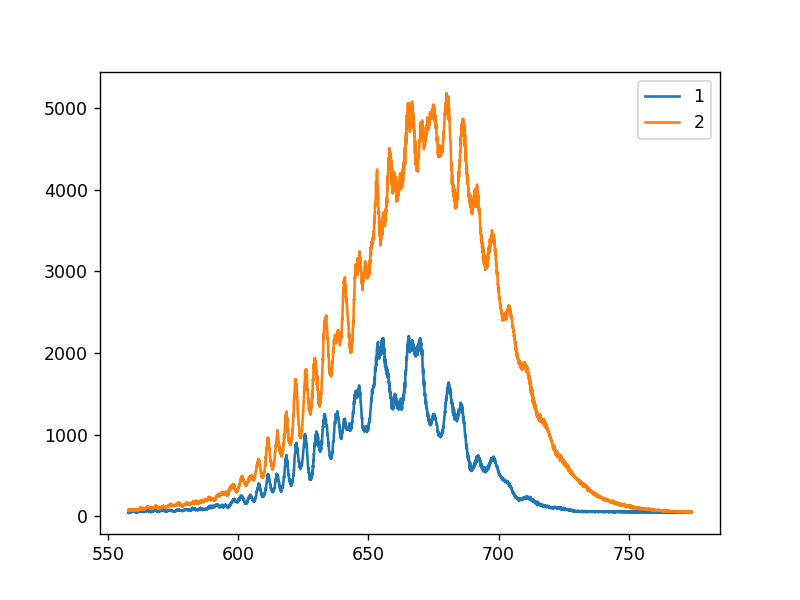

In [96]:
%matplotlib notebook
 
path = os.path.join(os.getcwd(), 'School 2022')

data1 = np.loadtxt(os.path.join(path,'473_NW7_xx_tip1_PL_D0_80%_200_200_600_x100_5x2_520-800nm.txt'))
data1 = data1[500:-500][:]
plt.plot(data1[:,0], data1[:, 1])



<IPython.core.display.Javascript object>


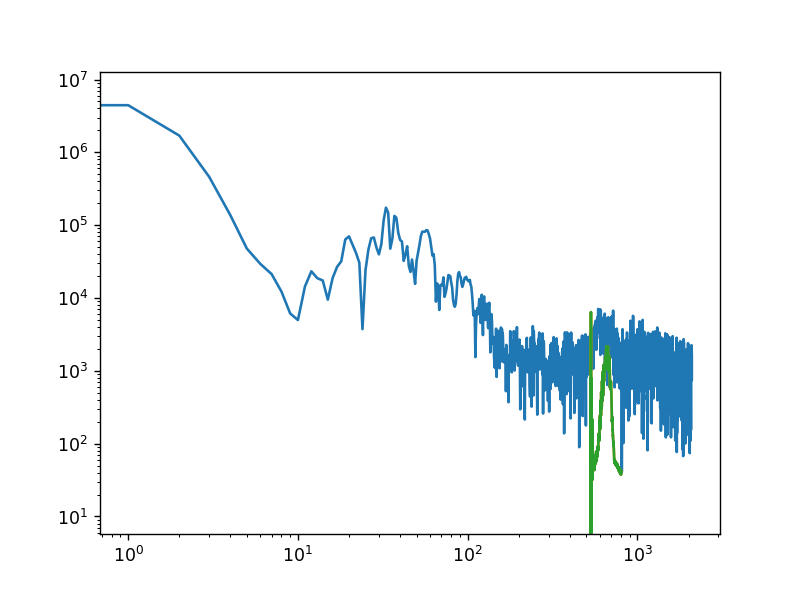

In [107]:
plt.plot(np.abs(np.fft.rfft(I_2)))
plt.yscale('log')
plt.xscale('log')

<IPython.core.display.Javascript object>


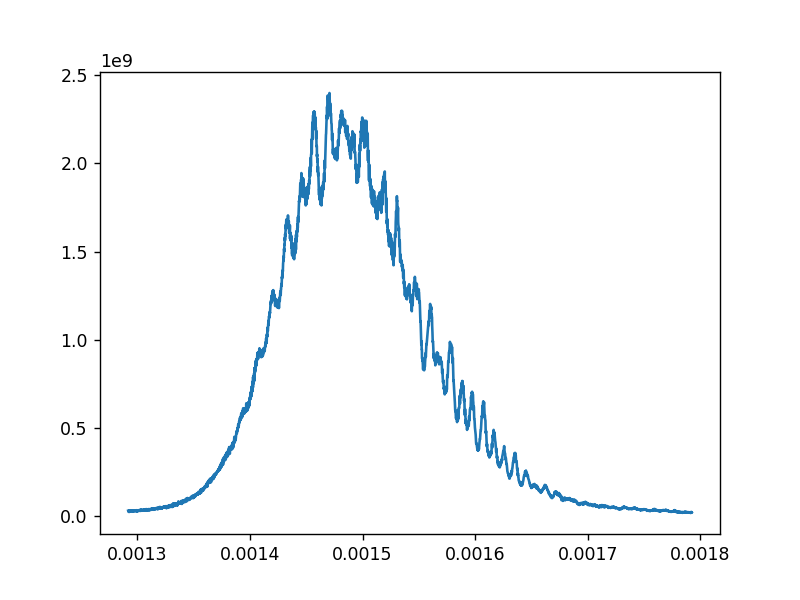

In [103]:
Lambda_2 = data2[:,0]
I_2 = data2[:, 1]
plt.figure()
plt.plot(1/Lambda_2, I_2*Lambda_2**2)
#plt.plot(1/Lambda_2, I_2*Lambda_2[0]**2)

<IPython.core.display.Javascript object>


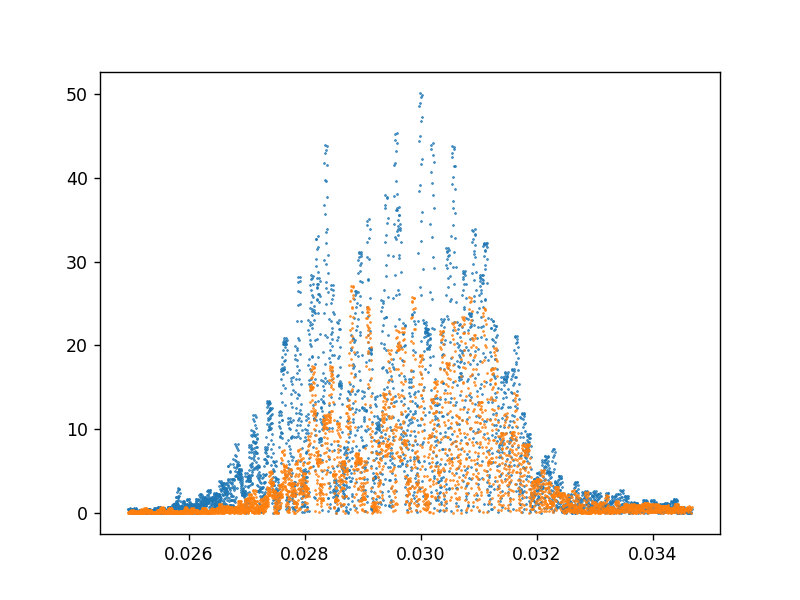

In [85]:
omega_2 = 1/data2[:-1, 0]
delta_lambda_2 = data2[1:, 0] - data2[:-1, 0]
delta_I_2 = np.abs(data2[1:, 1] - data2[:-1, 1])
delta_omega_2 = 1/delta_lambda_2*omega_1
plt.plot(delta_omega_2, delta_I_2, '.',markersize=1)

omega_1 = 1/data1[:-1, 0]
delta_lambda_1 = data1[1:, 0] - data1[:-1, 0]
delta_I_1 = np.abs(data1[1:, 1] - data1[:-1, 1])
delta_omega_1 = 1/delta_lambda_1*omega_1
plt.plot(delta_omega_1, delta_I_1, '.', markersize=1)

# b, a = signal.butter(8, 0.006, 'lowpass')  
# filtedData = signal.filtfilt(b,a, delta_I_1[:])
# plt.plot(delta_omega_2, filtedData)

In [53]:
np.set_printoptions(precision=5)
x = np.linspace(560, 840, 3093)
print(x)
np.savetxt('nums.txt', np.column_stack((x,x)), fmt='%.5f')

[560.      560.09056 560.18111 ... 839.81889 839.90944 840.     ]


array([[750.     , 750.     ],
       [750.04938, 750.04938],
       [750.09875, 750.09875],
       ...,
       [919.90125, 919.90125],
       [919.95062, 919.95062],
       [920.     , 920.     ]])